# Tugas PCD (Pemampatan Citra atau Kompresi Citra)

**Nama : Rahmat Aldino**

**NPM : 1910501050**

**Rombel : 2**


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [57]:
img = plt.imread("assets/cendrawasih_botak.jpg")
img.shape

(225, 320, 3)

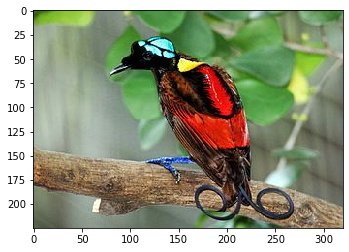

In [58]:
plt.imshow(img)

## Buat tiap pixel jadi data

In [59]:
img = img.reshape(-1, 3)
img

array([[ 79, 101,  52],
       [ 80, 103,  51],
       [ 80, 104,  52],
       ...,
       [178, 152, 117],
       [174, 148, 113],
       [173, 147, 110]], dtype=uint8)

In [60]:
len(img) # total pixel

72000

In [61]:
len(np.unique(img, axis=0)) # total unique color

41644

## Cluster 49318 warna menjadi 8 palet warna

In [62]:
kmeans = KMeans(n_clusters=8, random_state=42, n_jobs=-1)
labels = kmeans.fit_predict(img)

In [63]:
labels

array([6, 6, 6, ..., 3, 3, 3])

In [64]:
palette = kmeans.cluster_centers_.astype(int)
palette

array([[115, 115,  94],
       [ 31,  17,  12],
       [207, 233, 194],
       [139, 153, 122],
       [204,  34,  20],
       [ 92, 152,  74],
       [ 81,  78,  51],
       [169, 179, 156]])

In [66]:
quantized_img = palette[labels].reshape(225, 320, 3)
quantized_img

array([[[ 81,  78,  51],
        [ 81,  78,  51],
        [ 81,  78,  51],
        ...,
        [ 92, 152,  74],
        [ 92, 152,  74],
        [ 92, 152,  74]],

       [[ 81,  78,  51],
        [ 81,  78,  51],
        [ 81,  78,  51],
        ...,
        [ 92, 152,  74],
        [ 92, 152,  74],
        [ 92, 152,  74]],

       [[ 81,  78,  51],
        [ 81,  78,  51],
        [ 81,  78,  51],
        ...,
        [ 92, 152,  74],
        [ 92, 152,  74],
        [ 92, 152,  74]],

       ...,

       [[ 81,  78,  51],
        [ 81,  78,  51],
        [ 81,  78,  51],
        ...,
        [139, 153, 122],
        [169, 179, 156],
        [169, 179, 156]],

       [[ 81,  78,  51],
        [ 81,  78,  51],
        [ 81,  78,  51],
        ...,
        [139, 153, 122],
        [139, 153, 122],
        [139, 153, 122]],

       [[ 81,  78,  51],
        [ 81,  78,  51],
        [ 81,  78,  51],
        ...,
        [139, 153, 122],
        [139, 153, 122],
        [139, 153, 122]]

' untuk mempertahankan kualitas perlu ada nya tuning di bagian jumlah \ncluster agar image hampir mirip dengan aslinya'

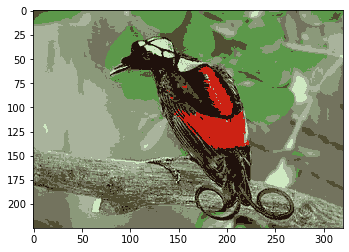

In [74]:
plt.imshow(quantized_img) 
""" untuk mempertahankan kualitas perlu ada nya tuning di bagian jumlah 
cluster agar image hampir mirip dengan aslinya""" 

In [68]:
def quantize(img, n_palette):
    n_unique = len(np.unique(img.reshape(-1, 3), axis=0))
    
    kmeans = KMeans(n_clusters=n_palette, random_state=42, n_jobs=-1)
    labels = kmeans.fit_predict(img.reshape(-1, 3))
    pallete = kmeans.cluster_centers_.astype(int)
    quantized_img = pallete[labels].reshape(*img.shape)
    
    plt.figure(figsize=(15, 6))
    plt.subplot(121)
    plt.imshow(img)
    plt.title(f"Original Image [{n_unique} colors]")
    plt.xticks([]); plt.yticks([])
    
    plt.subplot(122)
    plt.imshow(quantized_img)
    plt.title(f"Quantized Image [{n_palette} colors]")
    plt.xticks([]); plt.yticks([])

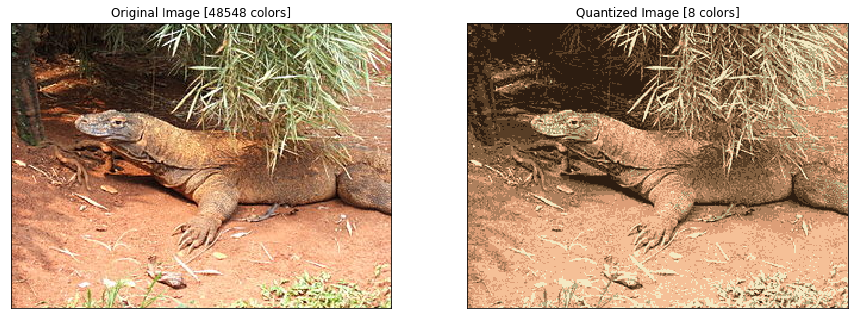

In [69]:
img = plt.imread("assets/komodo.jpg")
quantize(img, 8)

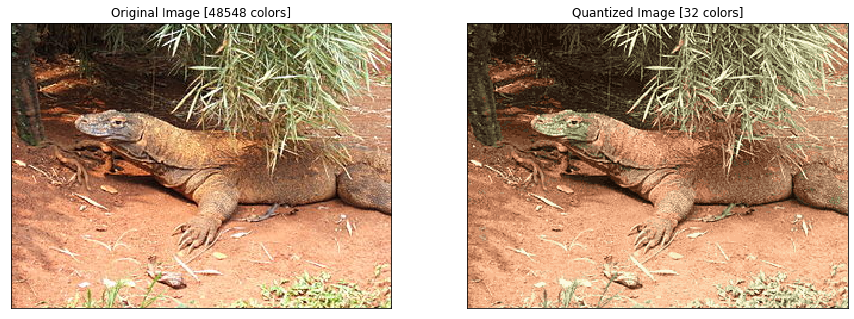

In [70]:
img = plt.imread("assets/komodo.jpg")
quantize(img, 32)

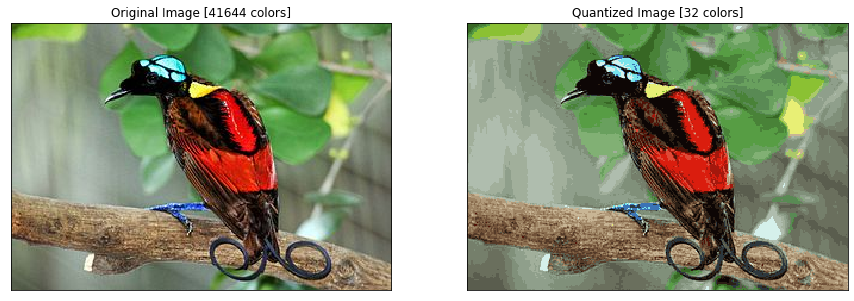

In [71]:
img = plt.imread("assets/cendrawasih_botak.jpg")
quantize(img, 32)

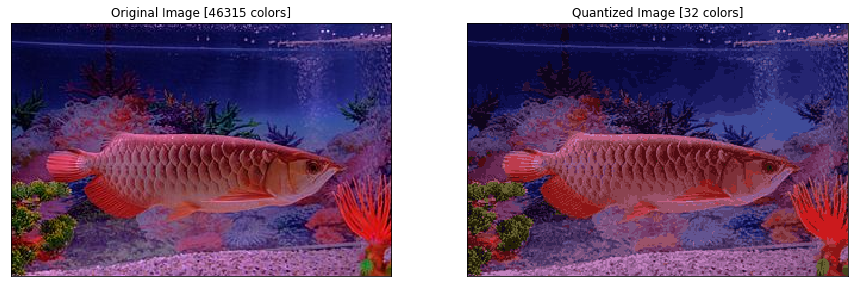

In [72]:
img = plt.imread("assets/arwana_merah.jpg")
quantize(img, 32)

# perhitungan komparasi nya

Original Image
- 100x100x3 RGB
- `(100*100)*(3*8bit) = 240.000 bit = 30 KB`

Compressed Image (32 palette)
- 100x100 label + 32x3 RGB
- `(100*100*4bit) + (32*3*8bit) = 40.768 bit = 5 KB`

In [75]:
from math import log10, sqrt
import numpy as np
import cv2

In [77]:
from math import log10, sqrt
import numpy as np
import cv2

def RumusPNSR(image, compres):
    mse = np.mean((image -compres)**2)
    if (mse == 0):
        return 100
    pixel = 255.0
    pnsr = 20 * log10(pixel/sqrt(mse))
    return pnsr


image = cv2.imread("assets/komodo asli.png")
compres = cv2.imread("assets/komodo kompress.png")
PNSR = RumusPNSR(image, compres)
print(PNSR)



30.512587000576666


In [78]:
from math import log10, sqrt

import numpy as np
import cv2

def PSNR(original,compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse==0):
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

original = cv2.imread("assets/komodo asli.png")
compressed = cv2.imread("assets/komodo kompress.png")
value = PSNR(original,compressed)
print(value)

30.512587000576666


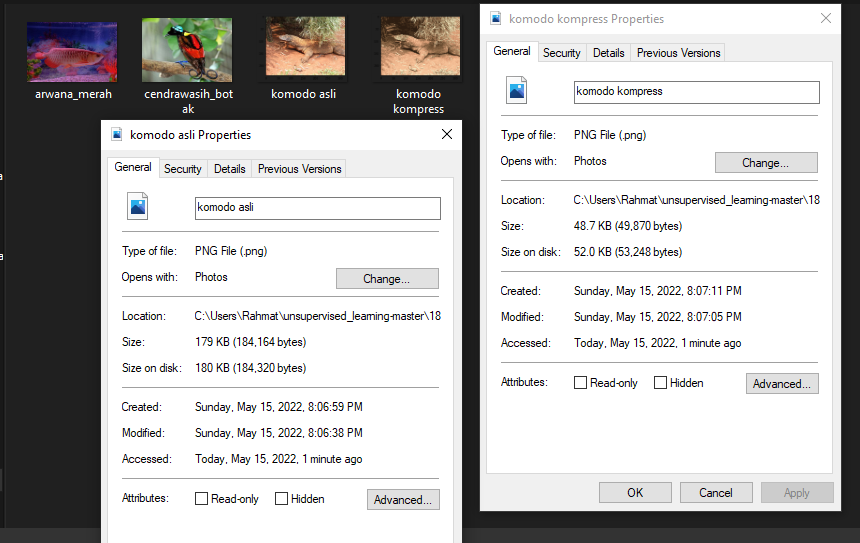